In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

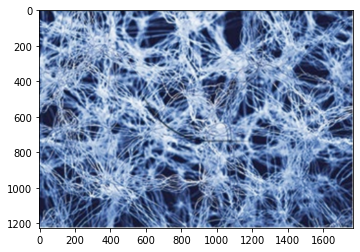

In [2]:
img = cv2.imread("input.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(1226, 1770, 3)


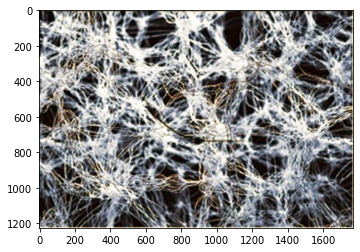

In [3]:
equ_r = cv2.equalizeHist(img[:, :, 0])
equ_g = cv2.equalizeHist(img[:, :, 1])
equ_b = cv2.equalizeHist(img[:, :, 2])
equ_2 = np.dstack([equ_r, equ_g, equ_b])
print(equ_2.shape)
plt.imshow(equ_2)

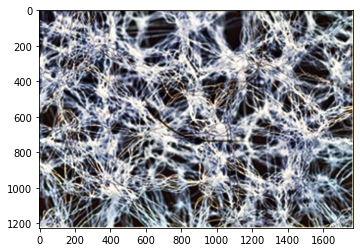

In [4]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl_r = clahe.apply(img[:, :, 0])
cl_g = clahe.apply(img[:, :, 1])
cl_b = clahe.apply(img[:, :, 2])
cl = np.dstack([cl_r, cl_g, cl_b])
plt.imshow(cl, cmap="gray")

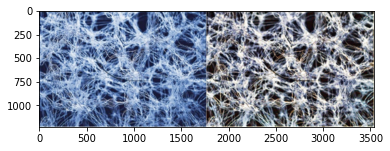

In [5]:
blured1 = cv2.bilateralFilter(img,9,75,75)
blured = blured2 = cv2.medianBlur(cl, 11)
plt.imshow(np.hstack([blured1, blured2]), cmap="gray")

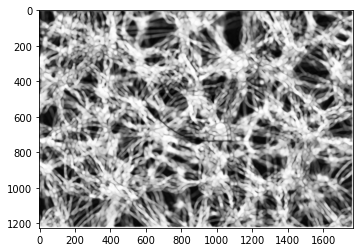

In [6]:
kernel = np.ones((5, 5))
iterations = 500
gray = cv2.cvtColor(blured, cv2.COLOR_BGR2GRAY)
gray = cv2.dilate(gray, kernel, iterations)
plt.imshow(gray, cmap="gray")

137.0


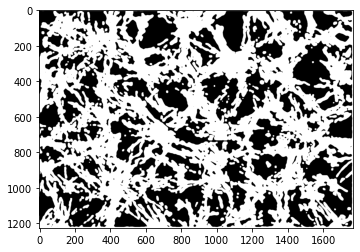

In [7]:
_, binary = cv2.threshold(gray, 50, 255, cv2.THRESH_OTSU)
print(_)
plt.imshow(binary, cmap="gray")

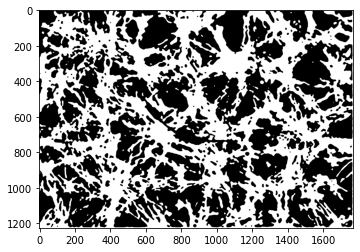

In [8]:
kernel = np.ones((5, 5))
iterations = 100
gray = cv2.erode(binary, kernel, iterations)
plt.imshow(gray, cmap="gray")